In [216]:
import yfinance as yf
import pandas as pd
import numpy as np
import optuna

from backtest import backtest_dca

In [ ]:
# df_origin = pd.read_csv("crypto.csv", index_col=0, parse_dates=True)
df_origin = pd.read_csv("stock.csv", index_col=0, parse_dates=True)
# df_origin = pd.read_csv("ucits_etf_market.csv", index_col=0, parse_dates=True)

df_origin = df_origin.dropna()
df_origin

,HSBA.L,BAB.L,BP.L,TSM,ASML.AS,JNJ,DIS,GOOGL,SPY
Date,,,,,,,,,
2019-01-02,646.599976,482.399994,507.299988,36.520000,137.460007,127.750000,108.970001,52.734001,250.179993
2019-01-03,641.400024,477.600006,508.700012,34.360001,131.740005,125.720001,106.330002,51.273499,244.210007
2019-01-04,656.500000,493.100006,520.799988,34.970001,133.699997,127.830002,109.610001,53.903500,252.389999
2019-01-07,642.099976,501.799988,520.799988,35.230000,137.039993,127.010002,110.559998,53.796001,254.380005
2019-01-08,649.099976,515.000000,519.799988,34.939999,136.119995,129.960007,111.419998,54.268501,256.769989
...,...,...,...,...,...,...,...,...,...
2025-12-23,1175.199951,1257.000000,427.500000,296.950012,903.200012,205.779999,113.220001,314.350006,687.960022
2025-12-24,1175.400024,1260.000000,425.850006,298.799988,899.000000,207.779999,114.480003,314.089996,690.380005
2025-12-29,1166.000000,1217.000000,427.049988,300.920013,906.799988,207.559998,114.190002,313.559998,687.849976


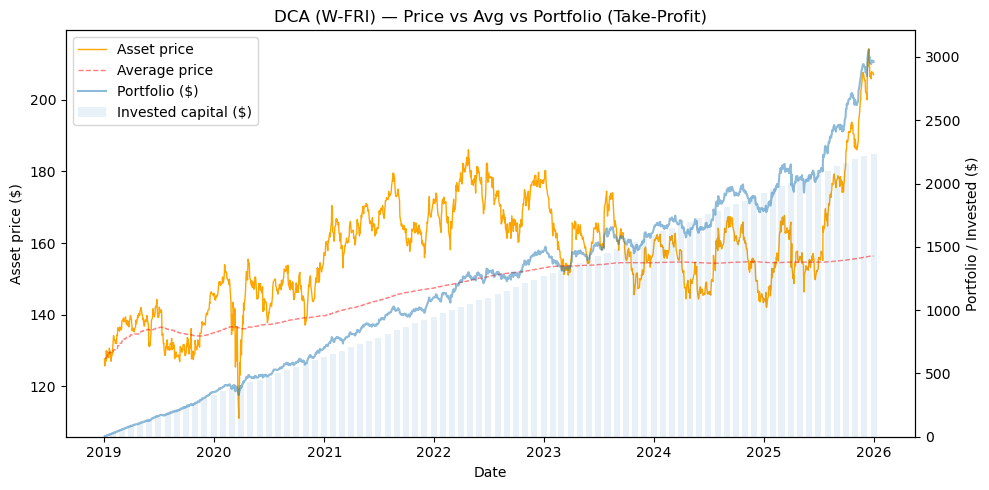

In [218]:
sol_prices = df_origin["JNJ"]
invest_sum = 1000 / (52 * 3)

res, metric = backtest_dca(
    prices=sol_prices,
    buy_amount=invest_sum,
    freq="W-FRI",
    available_sum=1_000_000,
    fee=0.001,
    profit_multiple=3,
    cooldown_days=180,
    plot=True
)

In [219]:
metric

{'Cash_spent': 2237,
 'Final_portfolio_value': 2960,
 'Realized_profit': 0,
 'Total_returns': 0,
 'Total_equity': 2960,
 'Num_take_profits': 0}

In [220]:
res

,Portfolio,Invested,Avg_price,Realized_profit,Returns
2019-01-02,0.000000,0.000000,NaN,0.0,0.0
2019-01-03,0.000000,0.000000,NaN,0.0,0.0
2019-01-04,6.403846,6.410256,127.957960,0.0,0.0
2019-01-07,6.362767,6.410256,127.957960,0.0,0.0
2019-01-08,6.510552,6.410256,127.957960,0.0,0.0
...,...,...,...,...,...
2025-12-23,2943.865788,2237.179487,156.381719,0.0,0.0
2025-12-24,2972.477566,2237.179487,156.381719,0.0,0.0
2025-12-29,2969.330253,2237.179487,156.381719,0.0,0.0
2025-12-30,2960.031512,2237.179487,156.381719,0.0,0.0


# всі монети

In [221]:
df_origin

,HSBA.L,BAB.L,BP.L,TSM,ASML.AS,JNJ,DIS,GOOGL,SPY
Date,,,,,,,,,
2019-01-02,646.599976,482.399994,507.299988,36.520000,137.460007,127.750000,108.970001,52.734001,250.179993
2019-01-03,641.400024,477.600006,508.700012,34.360001,131.740005,125.720001,106.330002,51.273499,244.210007
2019-01-04,656.500000,493.100006,520.799988,34.970001,133.699997,127.830002,109.610001,53.903500,252.389999
2019-01-07,642.099976,501.799988,520.799988,35.230000,137.039993,127.010002,110.559998,53.796001,254.380005
2019-01-08,649.099976,515.000000,519.799988,34.939999,136.119995,129.960007,111.419998,54.268501,256.769989
...,...,...,...,...,...,...,...,...,...
2025-12-23,1175.199951,1257.000000,427.500000,296.950012,903.200012,205.779999,113.220001,314.350006,687.960022
2025-12-24,1175.400024,1260.000000,425.850006,298.799988,899.000000,207.779999,114.480003,314.089996,690.380005
2025-12-29,1166.000000,1217.000000,427.049988,300.920013,906.799988,207.559998,114.190002,313.559998,687.849976


In [222]:
# df = df_origin["2023-01-01":"2024-01-01"].copy()
# df = df_origin["2024-01-01":"2025-01-01"].copy()
# df = df_origin["2025-01-01":"2026-01-01"].copy()
# df = df_origin["2025-01-01 00:00:00":].copy()

df = df_origin.copy()
df = df[['SPY', 'ASML.AS']]

df

,SPY,ASML.AS
Date,,
2019-01-02,250.179993,137.460007
2019-01-03,244.210007,131.740005
2019-01-04,252.389999,133.699997
2019-01-07,254.380005,137.039993
2019-01-08,256.769989,136.119995
...,...,...
2025-12-23,687.960022,903.200012
2025-12-24,690.380005,899.000000
2025-12-29,687.849976,906.799988


========== SPY ==========


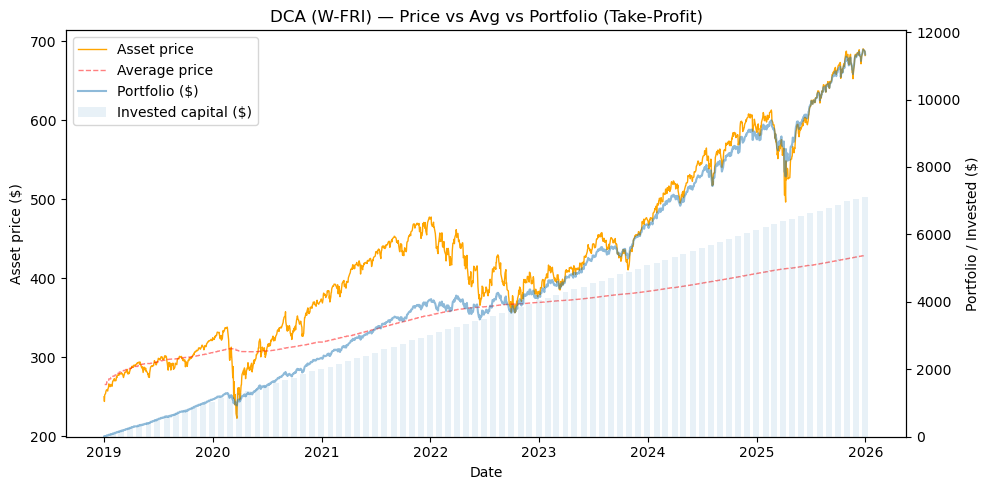

========== ASML.AS ==========


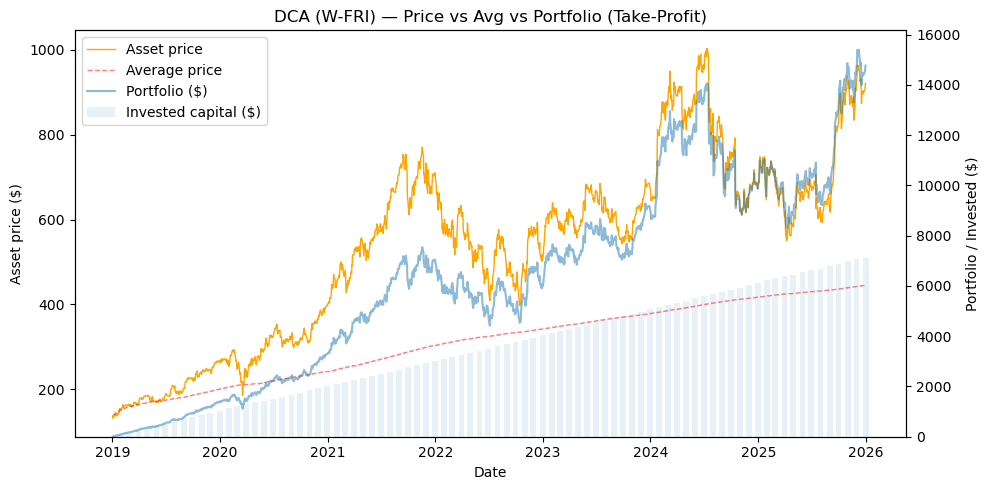

In [223]:
res = {}
metric = {}

selected_symbols = list(df.columns)[:10]
total_investment = 10_000
individual_investment = total_investment / len(selected_symbols)

total_days = len(df)
total_days = total_days // 7

for symbol in selected_symbols:
    print("=" * 10, symbol, "=" * 10)

    invest_sum = individual_investment / total_days

    prices = df[symbol]

    dca_result_one, dca_metrics_one = backtest_dca(
        prices=prices,
        buy_amount=invest_sum,
        freq="W-FRI",
        available_sum=1_000_000,
        fee=0.05,
        cooldown_days=180,
        profit_multiple=30,
        plot=True
    )

    res[symbol] = dca_metrics_one
    metric[symbol] = dca_metrics_one

In [224]:
results = pd.DataFrame(res).T

In [225]:
results.sort_values(by="Total_equity", ascending=False)

,Cash_spent,Final_portfolio_value,Realized_profit,Total_returns,Total_equity,Num_take_profits
ASML.AS,7122,14774,0,0,14774,0
SPY,7122,11336,0,0,11336,0


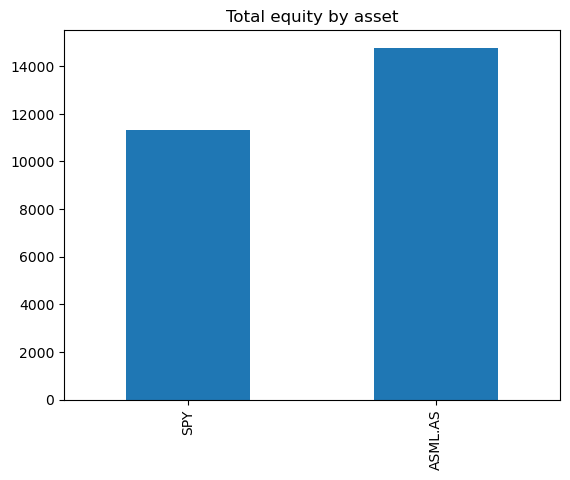

In [226]:
results['Total_equity'].sort_values().plot(kind='bar', title='Total equity by asset');

In [227]:
total_spend = results['Cash_spent'].sum()
total_equity = results['Total_equity'].sum()
total_profit = results['Realized_profit'].sum()

profit = total_equity - total_spend
lift = profit / total_spend * 100

print(f"Total spent: ${total_spend:,.0f}")
print(f"Total equity: ${total_equity:,.0f}")
print(f"Total profit: ${profit:,.0f}")
print(f"Lift: {lift:.2f}%")

Total spent: $14,244
Total equity: $26,110
Total profit: $11,866
Lift: 83.31%


MON - 59.43

TUE - 59.39

WED - 59.50

THU - 60.60

FRI - 59.18

In [228]:
results.index.tolist()

['SPY', 'ASML.AS']